In [2]:
%matplotlib inline
import math
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages

colors = ['red', 'green', 'blue', 'magenta']

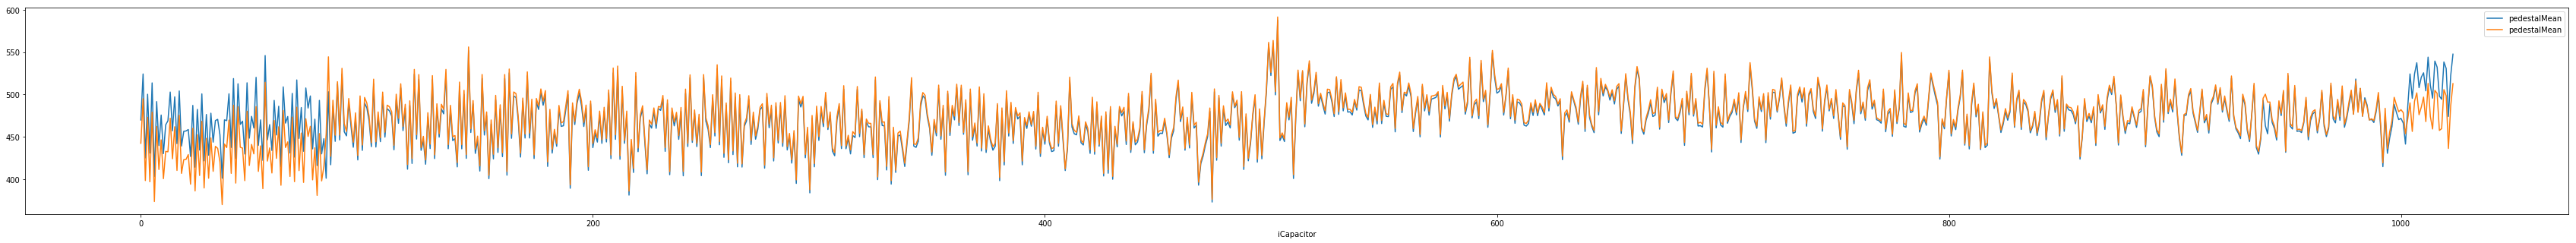

In [34]:
file1 = 'tca/periodA/v1_Run_000099/pedestals.csv'
file2 = 'tca/periodA/v1_Run_000101/pedestals.csv'

df1 = pd.read_csv(file1, sep=' ', comment = '#')
df2 = pd.read_csv(file2, sep=' ', comment = '#')

#df.head()

ax = df1[(df1['iHemi'] == 0) & (df1['iASM'] == 0) & (df1['iDRS'] == 0) & (df1['iQuartet'] == 0) & (df1['iChannel'] == 0)].plot(x='iCapacitor', y='pedestalMean')
df2[(df2['iHemi'] == 0) & (df2['iASM'] == 0) & (df2['iDRS'] == 0) & (df2['iQuartet'] == 0) & (df2['iChannel'] == 0)].plot(x='iCapacitor', y='pedestalMean', ax=ax, figsize=(60,5))

In [3]:
#file = '/home/ebusato/Travail/gowork2/src/gitlab.in2p3.fr/avirm/analysis-go/dpgatca/analysis/pedestal/output.csv'
file = 'tca/periodA/v1_Run_000099/pedestals.csv'

df = pd.read_csv(file)

Quartets = []
QuartetsWoData = []

for i in range(60):
    Pulses = []
    for j in range(4):
        s = 'ChanWithData240_'
        idx = i*4+j
        s += str(idx)
        #print(s)
        Pulses.append(df[s])
    Quartets.append(Pulses)

for i in range(12):
    Pulses = []
    for j in range(4):
        s = 'ChanWoData48_'
        idx = i*4+j
        s += str(idx)
        #print(s)
        Pulses.append(df[s])
    QuartetsWoData.append(Pulses)


KeyError: 'ChanWithData240_0'

In [19]:
def plotQuartet(pulses, ax, title):
    for i in range(4):
        pulses[i].plot.hist(alpha=0.3, bins=50, color=colors[i])
        ax.set_yscale('log')
        plt.text(0.05, 0.9, title, transform=ax.transAxes)
        plt.text(0.6, 0.8-0.1*i, format(pulses[i].mean(), '.1f'), transform=ax.transAxes, color=colors[i])
        plt.text(0.83, 0.8-0.1*i, format(math.sqrt(pulses[i].var()), '.1f'), transform=ax.transAxes, color=colors[i])

def plotRow(iPlot, iLAPDRow):
    plt.figure(iPlot, figsize=(25,4))
    plt.suptitle('Average amplitudes for LAPD row '+str(iLAPDRow), fontsize=16)

    for i in range(5):
        ax = plt.subplot(1, 6, i+1)
        plt.text(0.6, 0.9, "mean", transform=ax.transAxes)
        plt.text(0.83, 0.9, "std dev", transform=ax.transAxes)
        iQuartet = iLAPDRow*5+i
        plotQuartet(Quartets[iQuartet], ax, "Quartet "+str(iQuartet))
        
    ax = plt.subplot(1, 6, 6)
    plt.text(0.6, 0.9, "mean", transform=ax.transAxes)
    plt.text(0.83, 0.9, "std dev", transform=ax.transAxes)
    iQuartet = iLAPDRow
    plotQuartet(QuartetsWoData[iQuartet], ax, "QuartetWoData "+str(iQuartet))

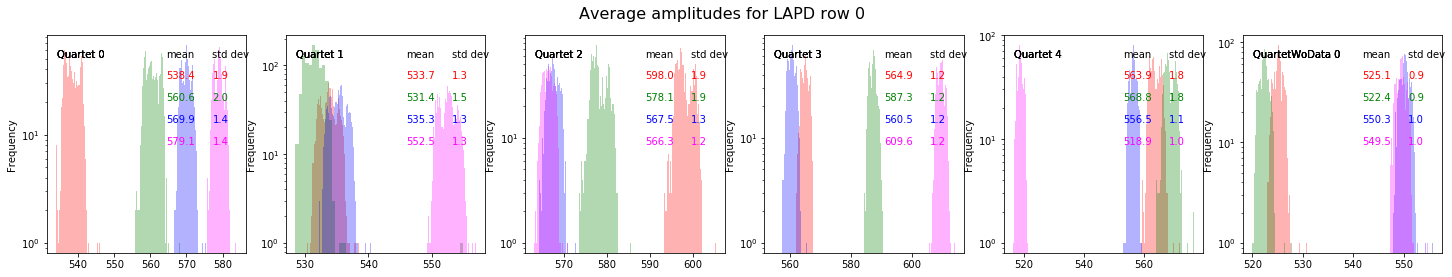

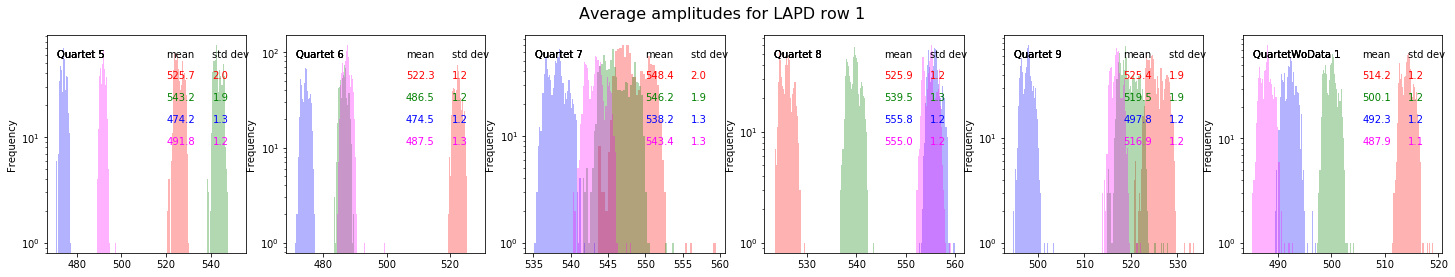

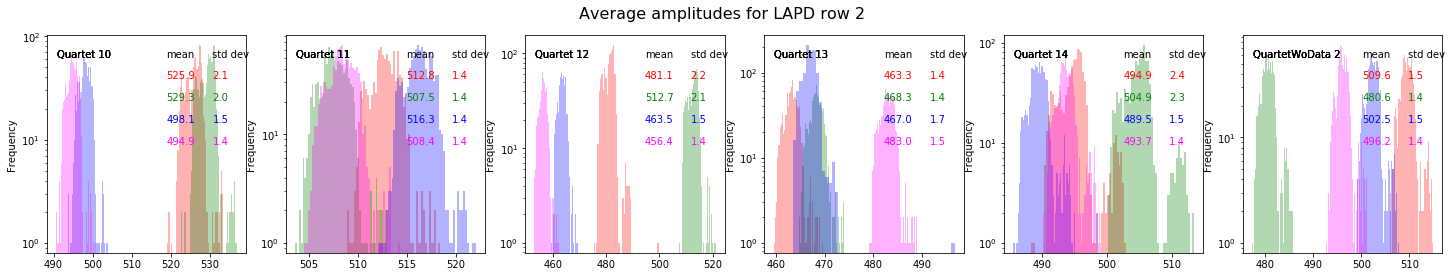

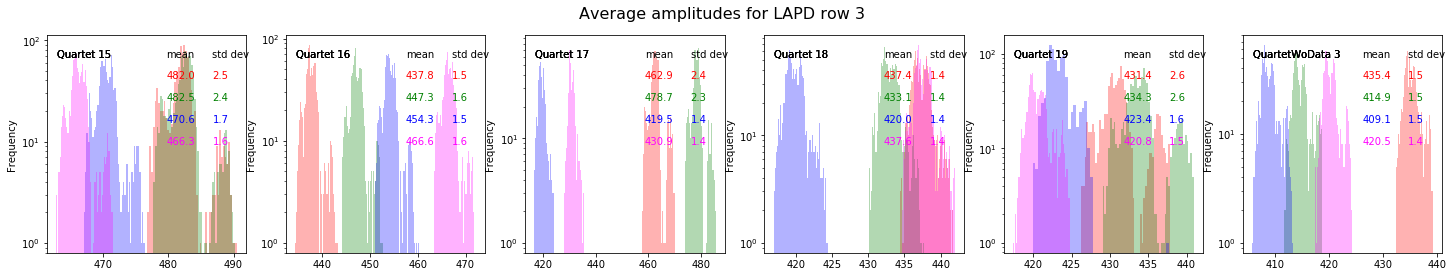

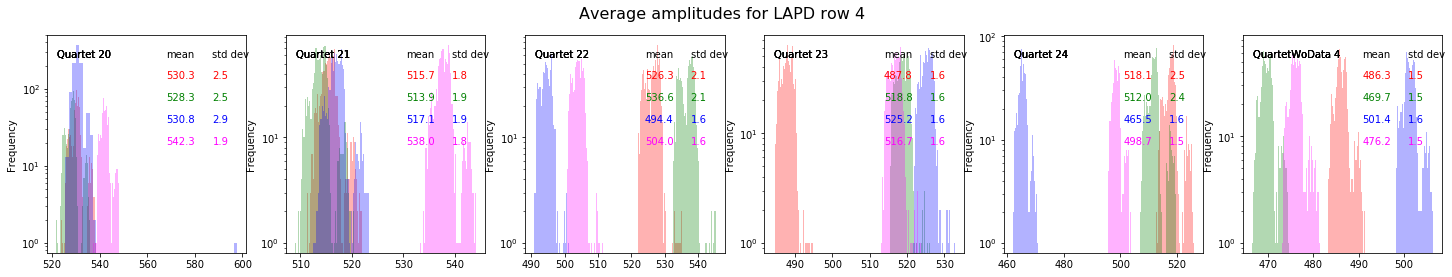

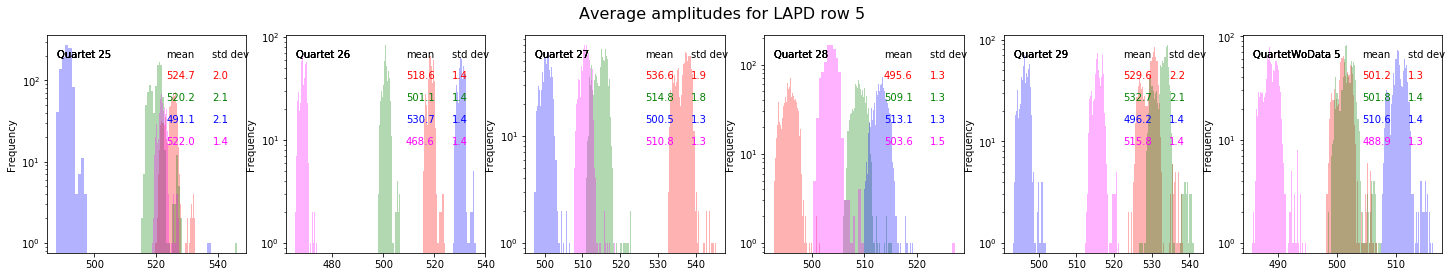

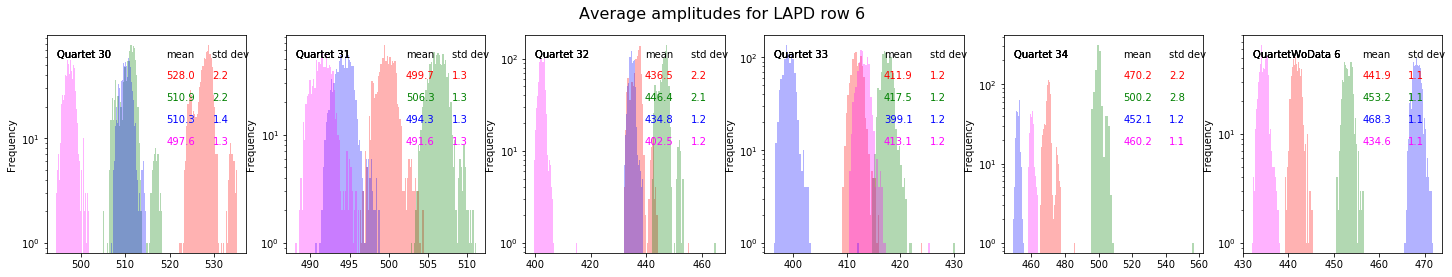

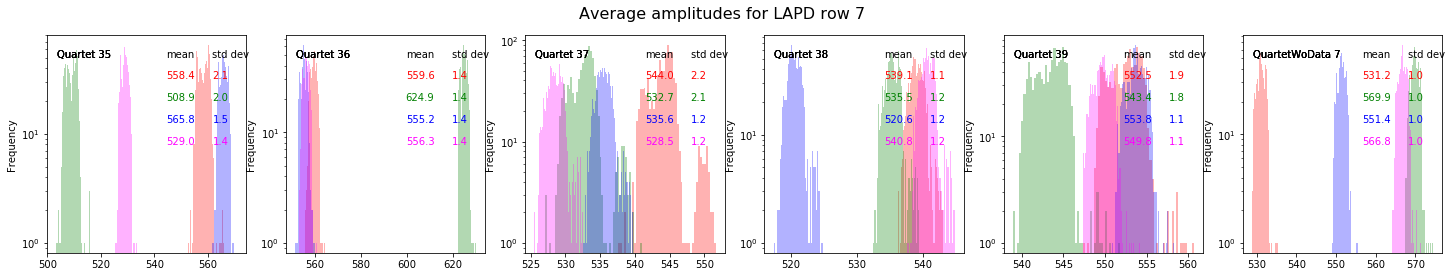

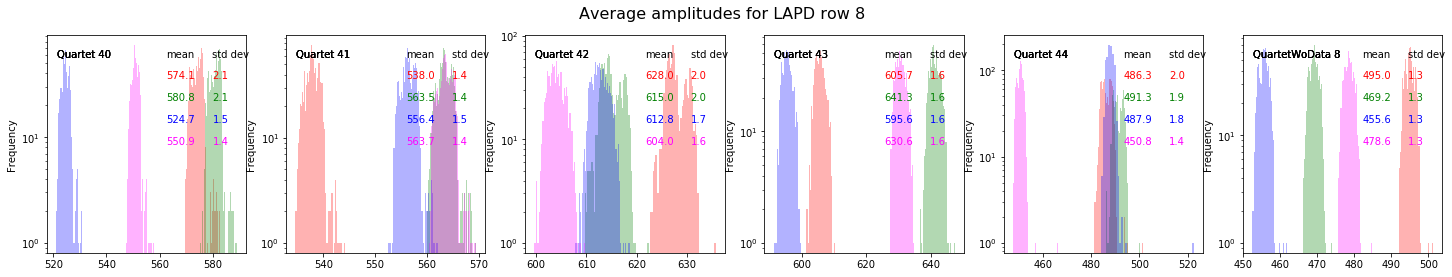

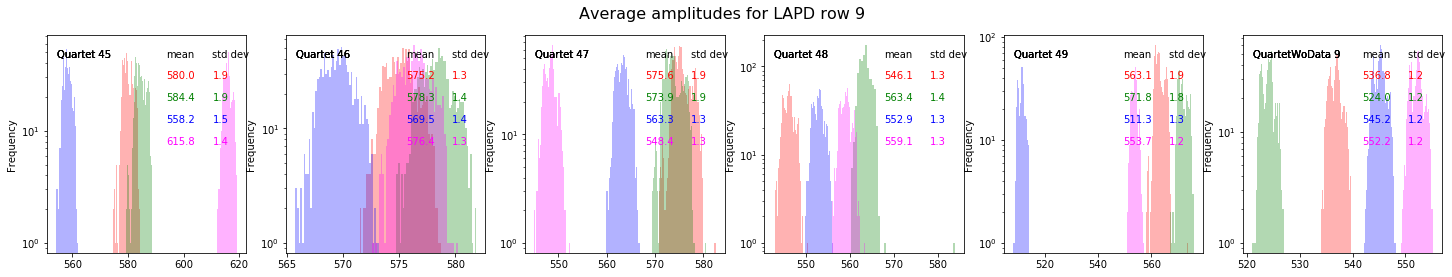

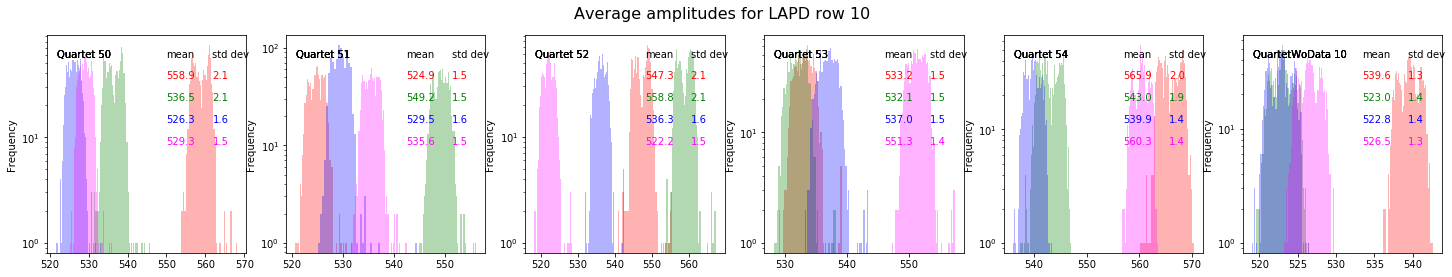

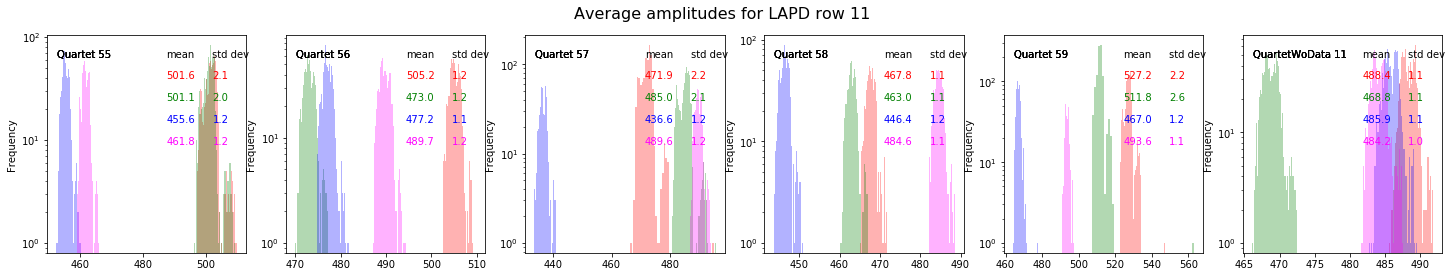

In [23]:

pp = PdfPages('Pedestals_VME.pdf')
for i in range(12):
    plotRow(iPlot=i+1, iLAPDRow=i)
    pp.savefig()
pp.close()